In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
        'BMI','DiabetesPedigreeFunction','Age','Outcome']

df = pd.read_csv(url, names=cols, header=None)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

X_train.shape, X_test.shape


((576, 8), (192, 8))

In [5]:

from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X_train_scaled = scaler1.fit_transform(X_train)
X_test_scaled = scaler1.transform(X_test)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

log1 = LogisticRegression()
log1.fit(X_train_scaled, y_train)
y_pred1 = log1.predict(X_test_scaled)

print("Classification Report (Before SMOTE):")
print(classification_report(y_test, y_pred1))


Classification Report (Before SMOTE):
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       121
           1       0.72      0.46      0.56        71

    accuracy                           0.73       192
   macro avg       0.73      0.68      0.69       192
weighted avg       0.73      0.73      0.72       192



In [8]:
!pip install imbalanced-learn

     ------------------------------------- 258.3/258.3 KB 73.2 kB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\gaura\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [9]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=15)
X_res, y_res = smote.fit_resample(X, y)

y_res.value_counts()


Outcome
1    500
0    500
Name: count, dtype: int64

In [10]:

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_res, y_res, test_size=0.25, random_state=10)

scaler2 = StandardScaler()
X_train2_scaled = scaler2.fit_transform(X_train2)
X_test2_scaled = scaler2.transform(X_test2)


In [11]:

log2 = LogisticRegression()
log2.fit(X_train2_scaled, y_train2)
y_pred2 = log2.predict(X_test2_scaled)

print("Classification Report (After SMOTE):")
print(classification_report(y_test2, y_pred2))


Classification Report (After SMOTE):
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       120
           1       0.77      0.73      0.75       130

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.75      0.74      0.74       250



In [12]:

from sklearn.metrics import precision_score, recall_score, f1_score

metrics = {
    'Accuracy': [accuracy_score(y_test, y_pred1), accuracy_score(y_test2, y_pred2)],
    'Precision': [precision_score(y_test, y_pred1), precision_score(y_test2, y_pred2)],
    'Recall': [recall_score(y_test, y_pred1), recall_score(y_test2, y_pred2)],
    'F1 Score': [f1_score(y_test, y_pred1), f1_score(y_test2, y_pred2)]
}

metrics_df = pd.DataFrame(metrics, index=['Before SMOTE','After SMOTE']).T.reset_index()
metrics_df = metrics_df.rename(columns={'index':'Metric'})
metrics_df


,Metric,Before SMOTE,After SMOTE
0,Accuracy,0.734375,0.744000
1,Precision,0.717391,0.766129
2,Recall,0.464789,0.730769
3,F1 Score,0.564103,0.748031


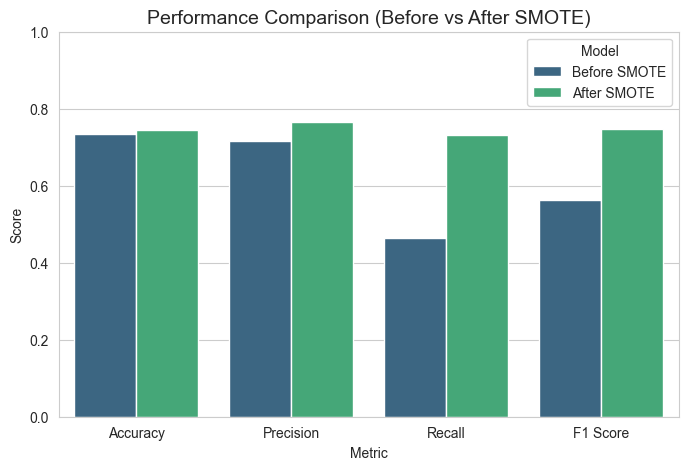

In [13]:

sns.set_style("whitegrid")
metrics_long = metrics_df.melt(id_vars='Metric', var_name='Model', value_name='Score')

plt.figure(figsize=(8,5))
sns.barplot(data=metrics_long, x='Metric', y='Score', hue='Model', palette='viridis')
plt.ylim(0, 1)
plt.title("Performance Comparison (Before vs After SMOTE)", fontsize=14)
plt.show()
